Name : HADIQA MAQSOOD

Task : PREDICTION USING DECISION TREE ALGORITHM

Level : INTERMEDIATE LEVEL 

Batch : LGMVIP September-2021

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
#Importing DATASET and Exploratory Data Analysis (EDA)

datasetfile = pd.read_csv('H:\Lets Grow More Internship\Iris Dataset.csv')

# Taking output of starting 10 rows

datasetfile.head(10)

# datasetfile.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


Some Insights of our dataset

In [4]:
datasetfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
datasetfile.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
datasetfile.shape

(150, 6)

In [7]:
datasetfile['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

Cleaning Dataset (Checking the null values if any exist)

<AxesSubplot:>

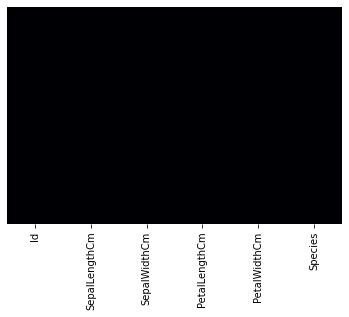

In [8]:
#Using heatmap

sns.heatmap(datasetfile.isnull(), yticklabels = False, cbar = False, cmap = "magma")

In [9]:
# Setting the "ID" coloumn as Index

datasetfile = datasetfile.set_index("Id")

In [10]:
datasetfile.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
datasetfile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


Plotting Data for Visual Analysis (EDA)

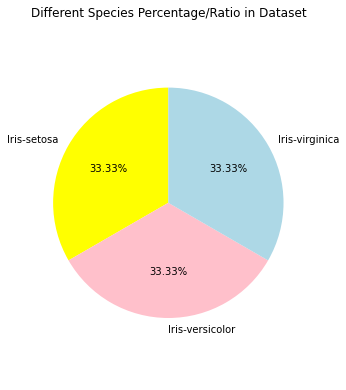

In [12]:
# Data Visualization (1)
# Pie Chart

fig = plt.figure(figsize=(4, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
colors = ['yellow','pink','lightblue']

df = datasetfile.copy()
sp = df['Species'].unique()
ct = df['Species'].value_counts().tolist()

ax.pie(ct, labels = sp, autopct='%1.2f%%', colors=colors, startangle=90)
plt.title('Different Species Percentage/Ratio in Dataset')
plt.show()

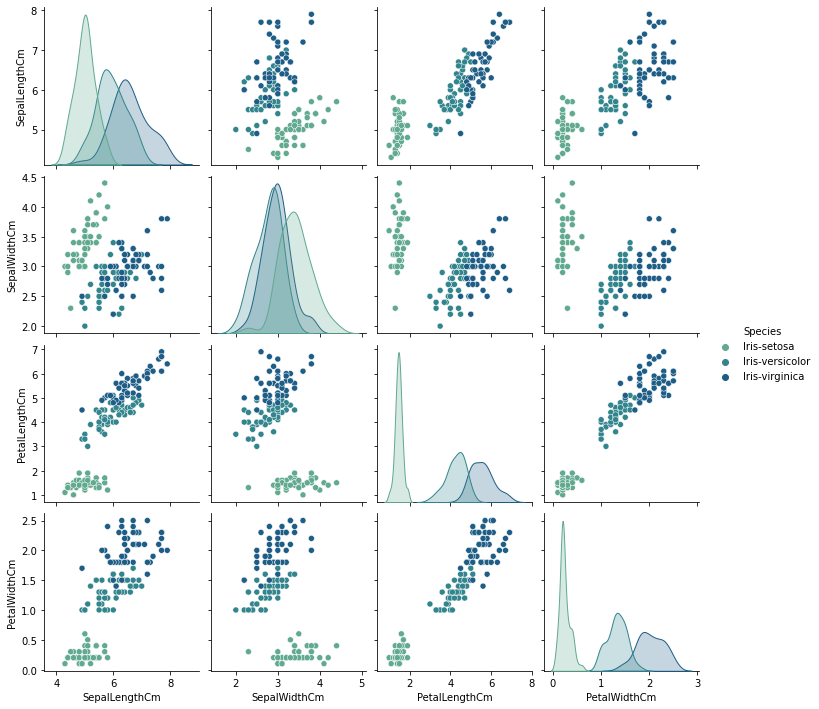

In [13]:
# Data Visualization (2)
# Pairplot

sns.pairplot(datasetfile, hue = 'Species', palette='crest')

Text(0.5, 1.0, 'Species vs Sepal Length')

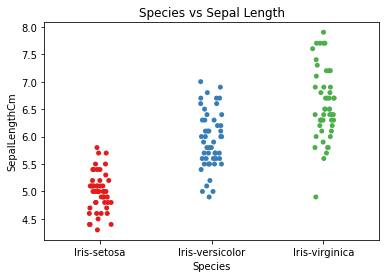

In [14]:
# Data Visualization (3)
# Stripplot

sns.stripplot(x = 'Species', y = 'SepalLengthCm', data = datasetfile, palette = 'Set1')
plt.title('Species vs Sepal Length')

Text(0.5, 1.0, 'Species vs Sepal Width')

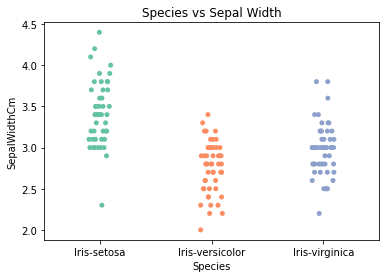

In [15]:
sns.stripplot(x = 'Species', y = 'SepalWidthCm', data = datasetfile, palette = 'Set2')
plt.title('Species vs Sepal Width')

Text(0.5, 1.0, 'Species vs Petal Length')

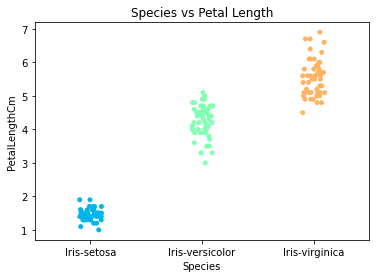

In [16]:
sns.stripplot(x = 'Species', y = 'PetalLengthCm', data = datasetfile, palette = 'rainbow')
plt.title('Species vs Petal Length')

Text(0.5, 1.0, 'Species vs Petal Width')

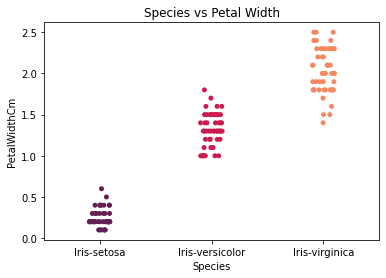

In [17]:
sns.stripplot(x = 'Species', y = 'PetalWidthCm', data = datasetfile, palette = 'rocket')
plt.title('Species vs Petal Width')

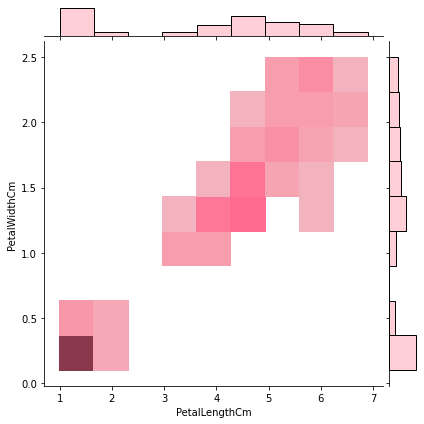

In [18]:
# Data Visualization (4)
# Jointplot

sns.jointplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = datasetfile, height = 6, ratio= 10, kind = 'hist', color = 'pink')
plt.show()

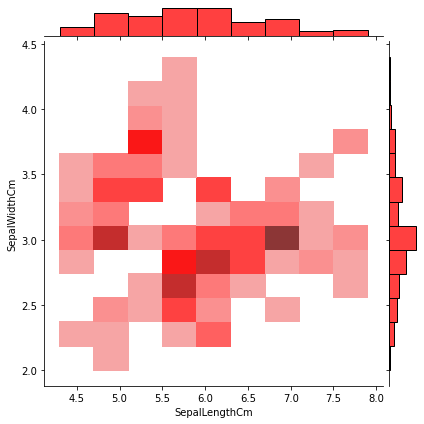

In [19]:
sns.jointplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = datasetfile, height = 6, ratio= 10, kind = 'hist', color = 'red')
plt.show()

It is concluded from the above JOINTPLOT that in our dataset major areas are of concentration, where dark-shaded boxes 
refer to higher concentration and light-shaded boxes refer to lesser concentration.

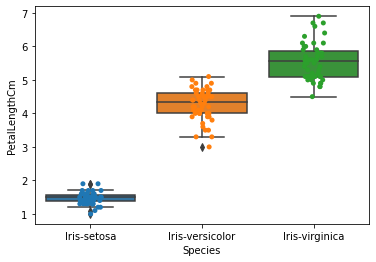

In [20]:
# Data Visualization (5)
# Boxplot and Stripplot

plot = sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = datasetfile)
plot = sns.stripplot(x = 'Species', y = 'PetalLengthCm', data = datasetfile, jitter = True, edgecolor = 'black')
plt.show()

Shuffling the dataset

In [21]:
datasetfile = datasetfile.sample(frac = 1)

In [22]:
# To see the shuffle dataset

datasetfile.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
8,5.0,3.4,1.5,0.2,Iris-setosa
15,5.8,4.0,1.2,0.2,Iris-setosa
25,4.8,3.4,1.9,0.2,Iris-setosa
117,6.5,3.0,5.5,1.8,Iris-virginica
24,5.1,3.3,1.7,0.5,Iris-setosa
108,7.3,2.9,6.3,1.8,Iris-virginica
58,4.9,2.4,3.3,1.0,Iris-versicolor
37,5.5,3.5,1.3,0.2,Iris-setosa
86,6.0,3.4,4.5,1.6,Iris-versicolor


Training and Testing the dataset

In [23]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [27]:
#defining the attributes and labels

X = datasetfile.iloc[:, [0,1,2,3]].values
le = LabelEncoder()
datasetfile['Species'] = le.fit_transform(datasetfile['Species'])

Y = datasetfile['Species'].values

datasetfile.shape

(150, 5)

In [28]:
# Splitting the data into test and train

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [29]:
# Printing values 

print("Training split:",X_train.shape)
print("Testing split:",X_test.shape)

Training split: (120, 4)
Testing split: (30, 4)


Now Creating the Decision Tree

In [30]:
#Import library

from sklearn.tree import DecisionTreeClassifier

In [31]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

print("Decision Tree Classifier is created!")

Decision Tree Classifier is created!


Classification Report & Confusion Matrix

In [32]:
# Import Library
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as sm

In [33]:
Y_pred = dtree.predict(X_test)

print("Classification Report: \n",classification_report(Y_test,Y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.78      0.88         9
           2       0.87      1.00      0.93        13

    accuracy                           0.93        30
   macro avg       0.96      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [34]:
print("Accuracy:",sm.accuracy_score(Y_test,Y_pred))

Accuracy: 0.9333333333333333


In [35]:
# Confusion Matrix

cm = confusion_matrix(Y_test,Y_pred)
cm

array([[ 8,  0,  0],
       [ 0,  7,  2],
       [ 0,  0, 13]], dtype=int64)

Test the MODEL on a random test case

In [36]:
testing_model = np.array([[6.3, 3.6, 5.4, 2.1]])

In [37]:
pred_testing = dtree.predict(testing_model)
pred_testing

array([2])

Visualization of trained model

In [38]:
# Storing features/attribute/columnnames of dataset

features = list(datasetfile.columns[:-1])
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [39]:
# Storing species uniques values

target = list(df.Species.unique())
target

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [40]:
# Import Library

from sklearn.tree import plot_tree

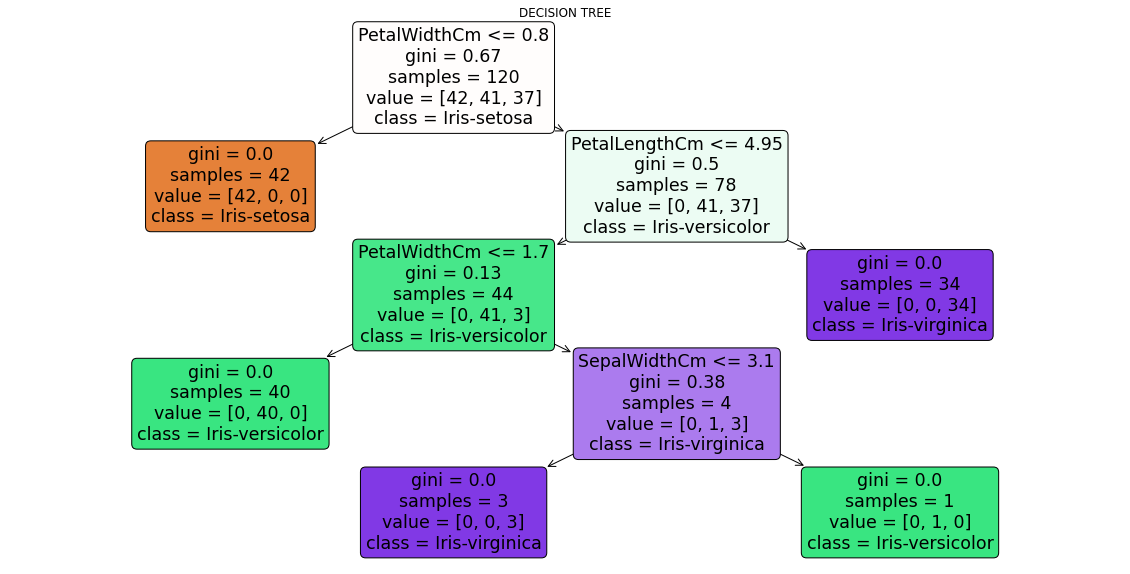

In [41]:
plt.figure(figsize = (20,10))
plot_tree(dtree, feature_names = features, precision=2, rounded=True, class_names = target,  filled = True)
plt.title('DECISION TREE')
plt.show()

Summary:
    
Insights of dataset.
Visual representation of dataset in various attributes style.
Test and Trained the model.
Creation and graphically visualization of Descision Tree Classifier. 
Prediction was calculated using decision tree algorithm.
Accuracy of the model was evaluated.